In [1]:
from Mask_RCNN_Detect import Mask_RCNN_Detect

Using TensorFlow backend.
C:\Users\jatin\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
mrcnn = Mask_RCNN_Detect()

W0725 00:22:41.932961 88772 deprecation_wrapper.py:119] From C:\Users\jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 00:22:41.947920 88772 deprecation_wrapper.py:119] From C:\Users\jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 00:22:41.950913 88772 deprecation_wrapper.py:119] From C:\Users\jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 00:22:41.969862 88772 deprecation_wrapper.py:119] From C:\Users\jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0725 00:22:41.972854 88772 deprecation_wrapper.py:119]

Loading weights from  weights/pretrained_weights.h5
initial detect works


In [3]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
files = os.listdir('imgcache/18/62239/'); files

['94165.png', '94166.png', '94167.png', '94168.png', '94169.png', '94170.png']

In [5]:
init = np.zeros([256*2, 256*3, 3])

In [6]:
for i in range(6):
    im = plt.imread('imgcache/18/62239/' + files[i])
    if i <= 2:
        init[0:256, i*256:(i+1)*256, :] = im
    else:
        i -= 3
        init[256:256*2, i*256:(i+1)*256, :] = im

In [7]:
init.shape

(512, 768, 3)

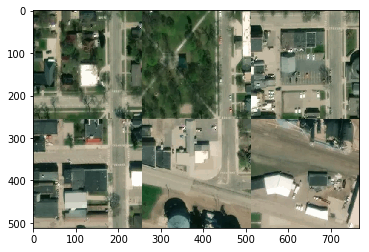

In [8]:
plt.imshow(init)

In [9]:
init = (init * 256).astype(np.uint8)

In [11]:
masks = mrcnn._detect_with_split(init); masks

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])

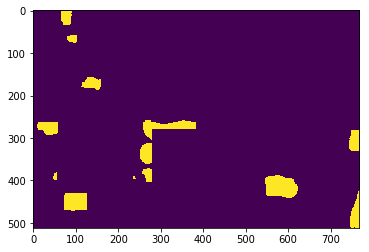

In [12]:
plt.imshow(masks)